### **DATA IMPORT**

In [ ]:
import pandas as pd
#!pip install forex-python

#Reading data from every sheet into different dataframes
df_companies = pd.read_excel("/content/2223MBD41_Project_Dataset-v01.xlsx", sheet_name="Sheet 1")
df_investment = pd.read_excel("/content/2223MBD41_Project_Dataset-v01.xlsx", sheet_name="INVESTMENT")
df_acquisition = pd.read_excel("/content/2223MBD41_Project_Dataset-v01.xlsx", sheet_name="ACQUISITION")
df_employee = pd.read_excel("/content/2223MBD41_Project_Dataset-v01.xlsx", sheet_name="EMPLOYEE")

### **DATA CLEANING**

In [ ]:
#drop duplicate rows::
df_companies = df_companies.drop_duplicates()
df_investment = df_investment.drop_duplicates()
df_acquisition = df_acquisition.drop_duplicates()
df_employee = df_employee.drop_duplicates()

#replace - values with NaN::
df_companies = df_companies.replace('—', 'NaN')
df_investment = df_investment.replace('—', 'NaN')
df_acquisition = df_acquisition.replace('—', 'NaN')
df_employee = df_employee.replace('—', 'NaN')

### **DATA SUMMARIZATION**

In [ ]:
df_companies.describe(include='all').T

,count,unique,top,freq
COMPANY_NAME,1000,1000,Twitter,1
CATEGORY,1000,977,"Biotechnology, Health Care, Medical, Pharmaceu...",5
LOCATION,1000,255,"San Francisco, California, United States",173
FOUNDED_ON,1000,428,2012,55
EXITED_ON,1000,269,NaN,678
CLOSED_ON,1000,6,NaN,995
REVENU_RANGE,1000,9,$1M to $10M,230
EMPLOYEE_NUMBER,1000,10,101-250,196


Analyzing the COMPANIES dataset, we see that maximum companies are in San Francisco region in the USA and there are 1000 unique companies in the dataset.

In [ ]:
df_investment.describe(include='all').T

,count,unique,top,freq
COMPANY_NAME,4770,935,SpaceX,32
FUNDING_TYPE,4770,28,Series A,665
MONEY_RAISED,4770,1210,NaN,856
ANNOUNCED_DATE,4770,2331,"Dec 8, 2020",25
INVESTMENT_STAGE,4770,5,NaN,1419


Analyzing the INVESTMENT dataset, we see that maximum companies have receieved Series A type of Funding. 

In [ ]:
df_acquisition.describe(include='all').T

,count,unique,top,freq
COMPANY_NAME,4196,497,Google,182
ACQUIREE_NAME,4196,4167,ADT Security,2
ANNOUNCED_DATE,4196,2691,"Dec 23, 2020",9
PRICE,4196,560,NaN,3128
ACQUISITION_TYPE,4196,6,Acquisition,3241


Analyzing the ACQUISITION dataset, we can see that Google has made maximum number of acquistions.

In [ ]:
df_employee.describe(include='all').T

,count,unique,top,freq
EMPLOYEE_MD5,20702,20702,aac4a9fe0edc50a77072eae64578a892,1
JOB_TITLES,20702,12308,Software Engineer,510
COMPANY_NAME,20702,964,Microsoft,1756
ATTENDED_SCHOOLS,6584,2973,Stanford University,159


Analyzing the EMPLOYEE dataset, we see that Software Engineering is the most frequently occuring job title in these companies.

### 1. *Names of companies who have recieved atleast one round of investment*

In [ ]:
resultant_df = df_investment['COMPANY_NAME'].value_counts()>=1
resultant_df = resultant_df.to_frame().add_suffix('_OF_MORE_THAN_ONE_ROUND_OF_INVESTMENT')
resultant_df = resultant_df[resultant_df["COMPANY_NAME_OF_MORE_THAN_ONE_ROUND_OF_INVESTMENT"] == True]
resultant_df

,COMPANY_NAME_OF_MORE_THAN_ONE_ROUND_OF_INVESTMENT
SpaceX,True
Tesla,True
Uber,True
Robinhood,True
Wave,True
...,...
Kit,True
Novo Nordisk,True
NEC Corporation,True
BBC,True


There are 935 companies that have received atleast one round of investment.

### *Number of companies with more than one round of investment*


In [ ]:
resultant_df.size

935

### 2. *The distributions of the current status of these companies*

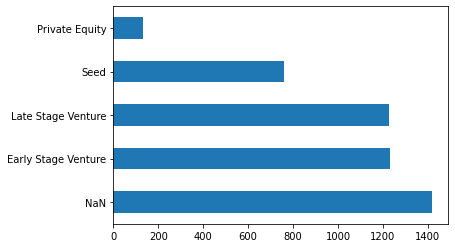

In [ ]:
df_investment['INVESTMENT_STAGE'].value_counts().plot.barh()

,COMPANY_NAME,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,2021-03-31,NaN
1,Epic Games,2021-04-13,Seed
2,Brex,2021-04-26,Late Stage Venture
3,Animoca Brands,2021-05-13,NaN
4,Paxos,2021-04-29,Late Stage Venture
...,...,...,...
960,QueQ,2019-03-29,Early Stage Venture
961,PTC,2018-06-11,NaN
962,Berkshire Hathaway,2019-08-15,NaN
963,Wipro Technologies,2007-09-01,NaN


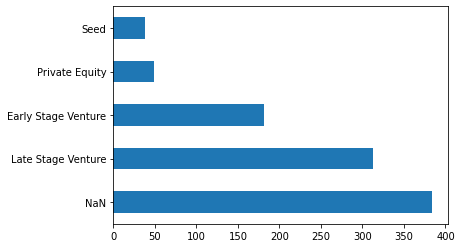

In [ ]:
from datetime import datetime
import numpy as np

def convert_str_to_date(str):
  return datetime.strptime(str, "%b %d, %Y")

#convert ANNOUNCED_DATE to proper date format
df_investment.ANNOUNCED_DATE = df_investment.ANNOUNCED_DATE.apply(convert_str_to_date)
df_inv_filtered = df_investment[{'COMPANY_NAME','INVESTMENT_STAGE','ANNOUNCED_DATE'}]

#group by company name to fetch the most recent ANNOUNCED_DATE for every company
df_inv_grouped = df_investment.groupby('COMPANY_NAME')
df_inv_grouped = df_inv_grouped.agg({'ANNOUNCED_DATE' : np.max})

#merge the two Dataframes to fetch the most recent INVESTMENT_STAGE for every company
merge_df = pd.merge(df_inv_filtered,df_inv_grouped, how='inner', on=['COMPANY_NAME','ANNOUNCED_DATE'])
display(merge_df)

#plot the CURRENT Distribution of INVESTMENT_STAGES of these companies
merge_df['INVESTMENT_STAGE'].value_counts().plot.barh()

Majority of the investments in these companies are in Early and Late stage Ventures.

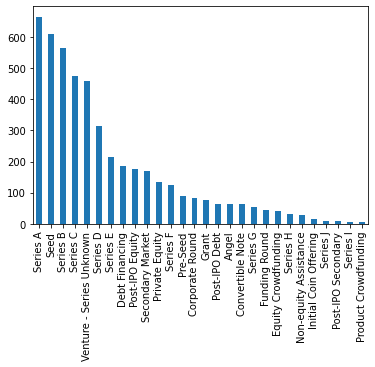

In [ ]:
df_investment['FUNDING_TYPE'].value_counts().plot.bar()

Most companies have received Series A type of funding followed by Seed AND Series B.

### *Number of acquisitions made by each company*

In [ ]:
acq = df_acquisition.COMPANY_NAME.value_counts().reset_index(name='Number of acquisitions')
print("Number of acquisitions made by each company->\n")
display(acq)

Number of acquisitions made by each company->



,index,Number of acquisitions
0,Google,182
1,Cisco,181
2,Microsoft,174
3,Accenture,159
4,EQT,139
...,...,...
492,Stitch Fix,1
493,Cedar,1
494,Goldbelly,1
495,Kaiser Permanente,1


### 3. *Company with the largest number of acquisitions*

In [ ]:
company_with_max_acquisitions = acq.loc[acq['Number of acquisitions'].idxmax()]
print("Company having the largest number of acquisition->\n")
display(company_with_max_acquisitions)

Company having the largest number of acquisition->



index                     Google
Number of acquisitions       182
Name: 0, dtype: object

Google has made the highest number of acquistions i.e, 182

### 4. *Average amount of money each company has recieved at Series A round of investment*



In [ ]:
from pprint import pprint
from forex_python.converter import CurrencyRates
from datetime import datetime, timedelta
import numpy as np

#data transformation steps::
#extract currencies and convert all to euros
import re
df_investment['CURRENCY_SYMBOL']= ''
df_investment['MONEY_RAISED_AMT']= ''
df_investment['MONEY_RAISED_CONVERTED_TO_EUROS']=''

#regex for extracting currency symbols
def get_symbol(price):
  pattern =  r'(\D*)[\d\,\.]+(\D*)'
  g = re.match(pattern, price.strip()).groups()
  return (g[0] or g[1]).strip()

#iterate over each row in dataframe and get the currency symbol from MONEY_RAISED column
for index, row in df_investment.iterrows():
  if(row['MONEY_RAISED']!='NaN'):
    row['CURRENCY_SYMBOL'] = get_symbol(row['MONEY_RAISED'])  

#extract only numbers from MONEY_RAISED column
def get_numbers(str):
  num = ""
  for c in str:
      if c.isdigit():
          num = num + c
  return num
df_investment.MONEY_RAISED_AMT = df_investment.MONEY_RAISED.str.replace(',','')
df_investment.MONEY_RAISED_AMT = df_investment.MONEY_RAISED.apply(get_numbers)

#fetch list of currency symbols present in the data set
currency_list = df_investment['CURRENCY_SYMBOL'].unique()
print("\n Curreny symbols present in the data set ->")
print('\n'.join(currency_list))

#replace currency symbols with currency codes in the dataset
c = CurrencyRates()
replace_values = {'$' : 'USD', '€' : 'EUR', '¥' : 'CNY', '₹':'INR', '£':'GBP','CA$':'CAD', 'A$':'AUD','CN¥':'CNY', 'R$':'BRL', '₩':'KRW'}
df_investment = df_investment.replace({"CURRENCY_SYMBOL": replace_values})

#fetch current exchange rates using forex api
curr_date= datetime.today()# - timedelta(days=0)
exchange_rate ={'USD':c.get_rate('USD','EUR',curr_date),
                'EUR':c.get_rate('EUR','EUR',curr_date),
                'CNY':c.get_rate('CNY','EUR',curr_date),
                'INR':c.get_rate('INR','EUR',curr_date),
                'GBP':c.get_rate('GBP','EUR',curr_date),
                'GBP':c.get_rate('GBP','EUR',curr_date),
                'CAD':c.get_rate('CAD','EUR',curr_date),
                'AUD':c.get_rate('AUD','EUR',curr_date),
                'KRW':c.get_rate('KRW','EUR',curr_date),
                'CHF':c.get_rate('CHF','EUR',curr_date),
                'AUD':c.get_rate('AUD','EUR',curr_date),
                'MYR':c.get_rate('MYR','EUR',curr_date),
                'SEK':c.get_rate('SEK','EUR',curr_date),
                'RUB':c.get_rate('RUB','EUR',curr_date),
                }
exchange_rate = {key : round(exchange_rate[key], 4) for key in exchange_rate}
print("\n Exchange rate of these currencies in EUROS ->")
pprint(exchange_rate)

#convert money_raised_amt to FLOAT datatype
df_investment.MONEY_RAISED_AMT = pd.to_numeric(df_investment.MONEY_RAISED_AMT, errors='coerce').fillna(0).astype(np.float64)

#convert MONEY_RAISED_CONVERTED_TO_EUROS to FLOAT datatype
df_investment['MONEY_RAISED_CONVERTED_TO_EUROS']=0.0
df_investment = df_investment.astype({'MONEY_RAISED_CONVERTED_TO_EUROS':float})
df_investment['MONEY_RAISED_CONVERTED_TO_EUROS'] = df_investment['MONEY_RAISED_AMT'].mul(df_investment['CURRENCY_SYMBOL'].map(exchange_rate)).fillna(0)
df_investment['MONEY_RAISED_CONVERTED_TO_EUROS'] = df_investment['MONEY_RAISED_CONVERTED_TO_EUROS'].round()

df1 = df_investment[df_investment.FUNDING_TYPE == 'Series A']['MONEY_RAISED_CONVERTED_TO_EUROS'].mean()
print("\n Average amount of money received by all companies in Series A round of funding ->")
display(df1)

print("\n Average amount of money received by each company in Series A round of funding ->")
df2 = df_investment[df_investment.FUNDING_TYPE == 'Series A']
df2 = df2.groupby('COMPANY_NAME')['MONEY_RAISED_CONVERTED_TO_EUROS'].mean().reset_index()
display(df2)


 Curreny symbols present in the data set ->
$

€
¥
₹
£
CA$
A$
CN¥
R$
ZAR
SGD
₩
CHF
MYR
SEK
RUB

 Exchange rate of these currencies in EUROS ->
{'AUD': 0.6306,
 'CAD': 0.6908,
 'CHF': 1.0163,
 'CNY': 0.1349,
 'EUR': 1.0,
 'GBP': 1.1293,
 'INR': 0.0113,
 'KRW': 0.0007,
 'MYR': 0.2123,
 'RUB': 0.0085,
 'SEK': 0.0896,
 'USD': 0.9391}

 Average amount of money received by all companies in Series A round of funding ->


21849358.97443609


 Average amount of money received by each company in Series A round of funding ->


,COMPANY_NAME,MONEY_RAISED_CONVERTED_TO_EUROS
0,1mg,5634600.0
1,23andMe,8408063.0
2,360VUZ,6661036.0
3,ATAI Life Sciences,23947050.0
4,AbCellera Biologics,4695500.0
...,...,...
556,ipsy,2587967.0
557,monday.com,7137160.0
558,project44,9860550.0
559,tabby,21599300.0


The Average amount of money received by all companies in Series A round of funding is 21849358 EUROS


### 5. *Companies having CEO's graduating from a top school*

In [ ]:
top_schools = ['Massachusetts Institute of Technology', 'MIT', 'Oxford', 'Stanford', 'Cambridge', 'Harvard', 'California Institute of Technology', 
               'Caltech', 'Imperial College London', 'ETH', 'Swiss Federal Institute of Technology', 'UCL', 'Chicago', 
               'National University of Singapore', 'NUS', 'Nanyang Technological', 'NTU', 'University of Pennsylvania', 'EPFL', 'Yale', 
               'Edinburgh', 'Tsinghua', 'Peking', 'Columbia', 'Princeton']

ceos_from_top_schools = df_employee[df_employee['JOB_TITLES'].str.contains('CEO') & df_employee['ATTENDED_SCHOOLS'].str.contains('|'.join(top_schools))]
ceos_from_top_schools = ceos_from_top_schools['COMPANY_NAME'].reset_index(drop=True).unique()
print('Count of companies having CEOs graduating from a top school:', ceos_from_top_schools.size)
ceos_from_top_schools_df = pd.DataFrame(ceos_from_top_schools,columns=['COMPANY_NAME'])
ceos_from_top_schools_df

Count of companies having CEOs graduating from a top school: 117


,COMPANY_NAME
0,Google
1,Berkshire Hathaway
2,OpenAI
3,Slack
4,Moderna Therapeutics
...,...
112,MuleSoft
113,eero
114,ExecOnline
115,BlocPower


There are 117 companies having CEOs from a top school/university.

### 6. *Count of employees for every company*

In [ ]:
count_of_employees = df_employee.groupby('COMPANY_NAME').agg(count_of_emp=('EMPLOYEE_MD5', 'count'))
count_of_employees.sort_values(by='count_of_emp', ascending=False)

,count_of_emp
COMPANY_NAME,
Microsoft,1756
Google,1598
Facebook,636
Intel,626
IBM,593
...,...
Pockit,1
Embracer Group,1
Urban Ladder,1


Microsoft, Google and Facebook have considerably large number of employees

### 7. *Count of companies having different revenue-ranges*

In [ ]:
num_of_companies = df_companies.groupby('REVENU_RANGE').agg(count_of_companies=('COMPANY_NAME', 'count'))
num_of_companies

,count_of_companies
REVENU_RANGE,
$100M to $500M,166
$10B+,42
$10M to $50M,216
$1B to $10B,77
$1M to $10M,230
$500M to $1B,47
$50M to $100M,103
Less than $1M,73
NaN,46


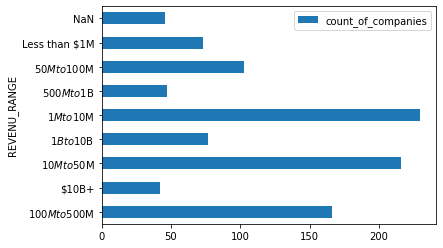

In [ ]:
num_of_companies.plot.barh()

Maximum companies i.e, 230 have revenue ranging between $1M to $10M	

### 8. *Count of companies having different count of employee range*

In [ ]:
num_of_companies = df_companies.groupby('EMPLOYEE_NUMBER').agg(count_of_companies=('COMPANY_NAME', 'count'))
num_of_companies

,count_of_companies
EMPLOYEE_NUMBER,
1-10,25
10001+,95
1001-5000,155
101-250,196
11-50,124
251-500,156
5001-10000,33
501-1000,119
51-100,95


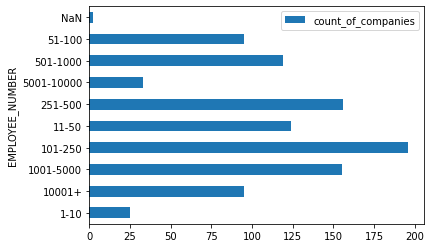

In [ ]:
num_of_companies.plot.barh()

196 companies have employee count ranging between 101 and 250. 

### 9. *Geographical distribution of companies across different countries*

In [ ]:
#!pip install geopy
import plotly.express as px

#extract city name from LOCATION column in Company dataset
# split column and add new columns to df
df_companies[['City', 'State', 'Country']] = df_companies['LOCATION'].str.split(',', n=2, expand=True)

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Your_Name")

df_companies['Latitude']=''
df_companies['Longitude']=''

#iterate over each row in dataframe
for index, row in df_companies.iterrows():
  if(row['City']!=''):
    location = geolocator.geocode(row['City'])
    row['Latitude'] = location.latitude
    row['Longitude'] = location.longitude

color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df_companies, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="COMPANY_NAME",
                        hover_data=["CATEGORY", "LOCATION"],
                        color_continuous_scale=color_scale,
                        zoom=0.5, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The companies are widespread across the whole world with concentrations in the USA- mainly San Francisco & New York followed by Europe in France, Germany, Switzerland and UK.

### 10. *Total Cost of Acquisition for every company*

In [ ]:
df_acquisition['CURRENCY_SYMBOL']= ''
df_acquisition['PRICE_AMT']= ''
df_acquisition['CURRENCY_CONVERTED_TO_EUROS']=''

#iterate over each row in dataframe
for index, row in df_acquisition.iterrows():
  if(row['PRICE']!='NaN'):
    row['CURRENCY_SYMBOL'] = get_symbol(row['PRICE'])  

#extract only numbers from PRICE column
df_acquisition.PRICE_AMT = df_acquisition.PRICE.str.replace(',','')
df_acquisition.PRICE_AMT = df_acquisition.PRICE.apply(get_numbers)

#fetch list of currency symbols present in the data set
currency_list = df_acquisition['CURRENCY_SYMBOL'].unique()
print("\nCurreny symbols present in the ACQUISITION data set->")
print(currency_list)

c = CurrencyRates()
replace_values = {'$' : 'USD', '€' : 'EUR', '¥' : 'CNY', '₹':'INR', '£':'GBP','CA$':'CAD', 'A$':'AUD','CN¥':'CNY', 'R$':'BRL', '₩':'KRW'}
df_acquisition = df_acquisition.replace({"CURRENCY_SYMBOL": replace_values})

#CONVERT money_raised_amt to FLOAT datatype
df_acquisition.PRICE_AMT = pd.to_numeric(df_acquisition.PRICE_AMT, errors='coerce').fillna(0).astype(np.float64)

print("\nExchange rate of these currencies in EUROS->")
print(exchange_rate)

df_acquisition['CURRENCY_CONVERTED_TO_EUROS']=0.0
df_acquisition = df_acquisition.astype({'CURRENCY_CONVERTED_TO_EUROS':float})
df_acquisition['CURRENCY_CONVERTED_TO_EUROS'] = df_acquisition['PRICE_AMT'].mul(df_acquisition['CURRENCY_SYMBOL'].map(exchange_rate)).fillna(0)
df_acquisition

print("\nTotal cost of acquisition for every company->")
df1 = df_acquisition.groupby('COMPANY_NAME')['CURRENCY_CONVERTED_TO_EUROS'].mean().reset_index()
display(df1)


Curreny symbols present in the ACQUISITION data set->
['$' '' '€' '£' 'A$' 'CA$' 'DKK' 'CHF' 'RUB' '₹' 'CN¥' 'R$' 'SEK']

Exchange rate of these currencies in EUROS->
{'USD': 0.9391, 'EUR': 1.0, 'CNY': 0.1349, 'INR': 0.0113, 'GBP': 1.1293, 'CAD': 0.6908, 'AUD': 0.6306, 'KRW': 0.0007, 'CHF': 1.0163, 'MYR': 0.2123, 'SEK': 0.0896, 'RUB': 0.0085}

Total cost of acquisition for every company->


,COMPANY_NAME,CURRENCY_CONVERTED_TO_EUROS
0,1mg,0.000000e+00
1,23andMe,0.000000e+00
2,ATAI Life Sciences,0.000000e+00
3,AbCellera Biologics,2.817300e+07
4,Accenture,3.249742e+06
...,...,...
492,iFood,0.000000e+00
493,iZettle,0.000000e+00
494,ipsy,4.695500e+08
495,nCino,0.000000e+00


### 11. *Company that has the highest cost for acquisitions*

In [ ]:
print('Company that had the largest cost of acquisitions->')
df1.loc[df1['CURRENCY_CONVERTED_TO_EUROS'].idxmax()]

Company that had the largest cost of acquisitions->


COMPANY_NAME                   Charter Communications
CURRENCY_CONVERTED_TO_EUROS             13147400000.0
Name: 83, dtype: object

Charter Communications has incurred the highest cost on its acquisitions 13147400000.0 EUROS.

### 12. *Percentage of companies who have recieved investments*

In [ ]:
all_companies_count = df_companies.COMPANY_NAME.unique().size
all_companies_count

companies_with_investments_count = df_investment.COMPANY_NAME.unique().size
companies_with_investments_count

percentage = (companies_with_investments_count/all_companies_count)*100
percentage

93.5

93.5% of the total 1000 companies have received investments.

### 13. *Percentage of companies who have acquired other companies*

In [ ]:
companies_with_acquisitions_count = df_acquisition.COMPANY_NAME.unique().size
companies_with_acquisitions_count

percentage = (companies_with_acquisitions_count/all_companies_count)*100
percentage

49.7

49.7% of the total 1000 companies have acquired other companies.

### 14. *Count of number of acquisitions made by each company*

In [ ]:
df = df_companies.merge(df_acquisition, on='COMPANY_NAME', how='inner')
df_gp = df.groupby('COMPANY_NAME')['ACQUIREE_NAME'].count()
df_gp.sort_values(ascending=False).to_frame()

,ACQUIREE_NAME
COMPANY_NAME,
Google,182
Cisco,181
Microsoft,174
Accenture,159
EQT,139
...,...
PhonePe,1
Exclaimer,1
Exabeam,1


Google has acquired the maximum number of companies i.e 182

### *15. Number of companies who have recieved funding location wise*

In [ ]:
df = df_companies.merge(df_investment, on='COMPANY_NAME', how='inner')
#df3 = df3.loc[df3.FUNDING_TYPE == 'Series A']
df_grouped = df.groupby('LOCATION')['FUNDING_TYPE'].count()
df_grouped = df_grouped.to_frame().add_suffix('_COUNT').reset_index()
df_grouped.sort_values(by='FUNDING_TYPE_COUNT',ascending=False)

,LOCATION,FUNDING_TYPE_COUNT
190,"San Francisco, California, United States",938
153,"New York, New York, United States",525
117,"London, England, United Kingdom",287
21,"Boston, Massachusetts, United States",145
8,"Bangalore, Karnataka, India",112
...,...,...
149,"Needham, Massachusetts, United States",1
157,"Norwalk, Connecticut, United States",1
160,"Omaha, Nebraska, United States",1
169,"Phoenixville, Pennsylvania, United States",1
